In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

#Import the data 

In [5]:
df = pd.read_csv("data.csv")
df.head()



,employee_id,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
0,c4578853,Bottom,4.6,N,205,10,N,N,12,N,0,Y,San Francisco
1,a7d7afd6,Middle,5.3,N,227,14,N,Y,18,N,0,N,New York
2,272b93f1,Bottom,5.2,N,227,10,N,N,12,N,0,Y,Chicago
3,be8b6baa,Middle,4.9,N,273,19,N,N,26,Y,0,N,New York
4,a18ecc4e,Bottom,4.9,N,227,17,Y,N,26,Y,5,Y,Orlando


In [ ]:
df.info()

# Cheaking Null 

In [4]:
df.isnull().any()



employee_id          False
performance_group    False
yrs_employed         False
manager_hire         False
test_score           False
group_size           False
concern_flag         False
mobile_flag          False
customers            False
high_hours_flag      False
transfers            False
reduced_schedule     False
city                 False
dtype: bool

# Conversion 

In [8]:
df.replace(['Y','N'],[1,0],inplace = True)


In [9]:
df.replace(['Top','Middle','Bottom'],[2,1,0],inplace = True)

Statistic overview 
  type 
  

In [10]:
df.shape

(571, 13)

In [11]:
df.dtypes

employee_id           object
performance_group      int64
yrs_employed         float64
manager_hire           int64
test_score             int64
group_size             int64
concern_flag           int64
mobile_flag            int64
customers              int64
high_hours_flag        int64
transfers              int64
reduced_schedule       int64
city                  object
dtype: object

In [12]:
df.describe()

,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,0.889667,4.595622,0.050788,240.171629,11.823117,0.099825,0.241681,21.061296,0.395797,0.796848,0.250438
std,0.574378,0.536197,0.219757,80.042326,2.947831,0.300029,0.428477,4.876160,0.489450,1.113265,0.433645
min,0.000000,2.000000,0.000000,0.000000,5.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,1.000000,4.300000,0.000000,182.000000,10.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
50%,1.000000,4.600000,0.000000,235.000000,11.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,0.000000,295.000000,13.000000,0.000000,0.000000,24.000000,1.000000,2.000000,0.500000
max,2.000000,6.000000,1.000000,500.000000,25.000000,1.000000,1.000000,40.000000,1.000000,5.000000,1.000000


Correlation Matrix & heatmap

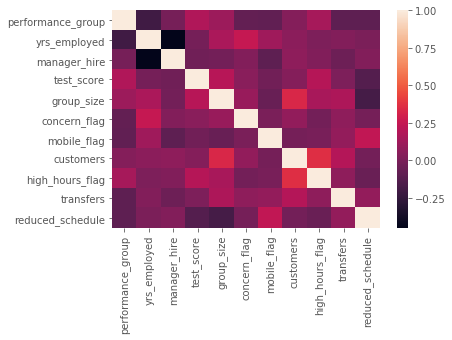

In [14]:
corr= df.corr()

sns.heatmap(corr,xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [15]:
Corr 

,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule
performance_group,1.000000,-0.203225,-0.011124,0.184687,0.115900,-0.078501,-0.083932,0.034365,0.149367,-0.095475,-0.093133
yrs_employed,-0.203225,1.000000,-0.447749,-0.014294,0.168109,0.256815,0.128319,0.058950,0.010626,0.028191,0.004724
manager_hire,-0.011124,-0.447749,1.000000,-0.032911,-0.018606,0.029404,-0.093322,0.067490,0.024823,-0.043805,0.031983
test_score,0.184687,-0.014294,-0.032911,1.000000,0.203271,0.054076,-0.028835,0.035034,0.202197,0.010945,-0.127955
group_size,0.115900,0.168109,-0.018606,0.203271,1.000000,0.105295,-0.061935,0.332859,0.154395,0.171328,-0.186246
concern_flag,-0.078501,0.256815,0.029404,0.054076,0.105295,1.000000,0.003059,0.078554,-0.018642,0.071327,-0.017192
mobile_flag,-0.083932,0.128319,-0.093322,-0.028835,-0.061935,0.003059,1.000000,-0.017179,-0.005186,0.088398,0.240200
customers,0.034365,0.058950,0.067490,0.035034,0.332859,0.078554,-0.017179,1.000000,0.361771,0.196854,-0.018058
high_hours_flag,0.149367,0.010626,0.024823,0.202197,0.154395,-0.018642,-0.005186,0.361771,1.000000,0.070552,-0.054545
transfers,-0.095475,0.028191,-0.043805,0.010945,0.171328,0.071327,0.088398,0.196854,0.070552,1.000000,0.087402
